<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

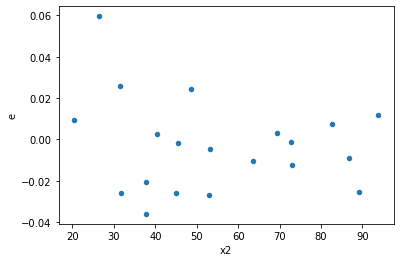

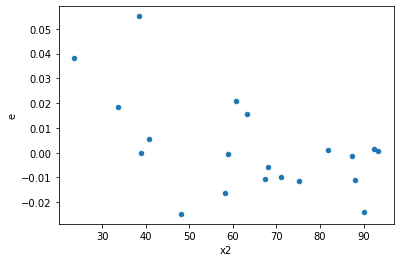

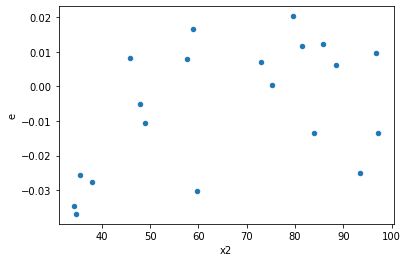

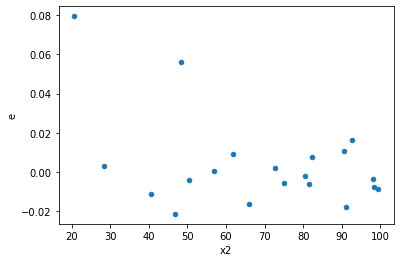

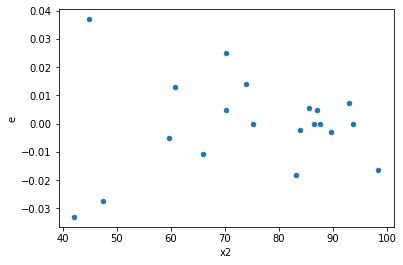

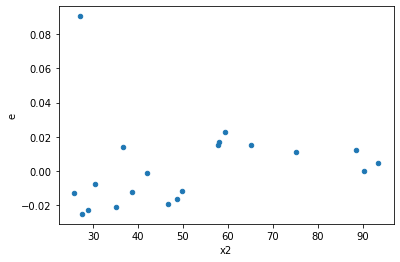

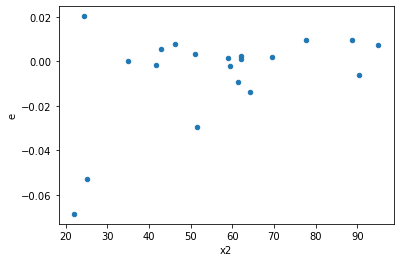

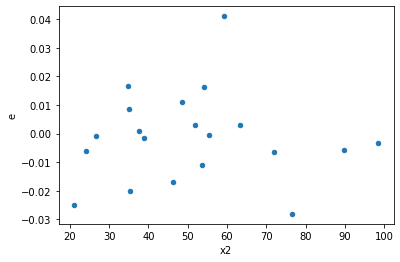

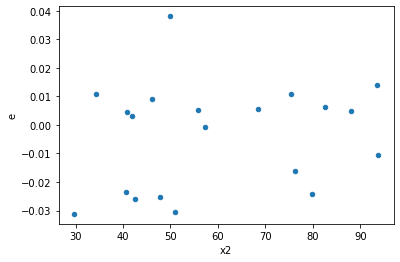

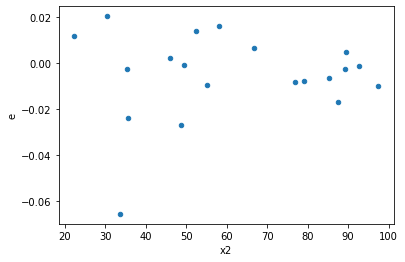

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,0.0007353698158102862,0.0010255655459890365,0.00014707396316205725,0.0002051131091978073,1.394625566537553,0.7240164247797367,0.6379917876101316,0.36200821238986836,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.0008590776290654956,0.003604172820935901,0.00017181552581309914,0.0007208345641871802,4.195398295793733,0.14157869119355415,0.9292106544032229,0.07078934559677708,Reject001=1 : Homoscedasticity
22.0,5.0,5.0,0.001562454607084381,0.0017486167535209884,0.0003124909214168762,0.0003497233507041977,1.1191472351212786,0.9047017250507199,0.5476491374746401,0.45235086252535994,Reject001=1 : Homoscedasticity
27.0,5.0,5.0,0.00409696807696205,0.004198213454558064,0.00081939361539241,0.0008396426909116128,1.0247122690960992,0.979281141889726,0.510359429055137,0.489640570944863,Reject001=1 : Homoscedasticity
33.0,5.0,5.0,0.00025092003033802784,0.0012016411728940765,5.018400606760557e-05,0.0002403282345788153,4.788940808253853,0.11066939118137076,0.9446653044093146,0.05533469559068538,Reject001=1 : Homoscedasticity
34.0,5.0,5.0,0.0010274077338160968,0.0016738218551129904,0.00020548154676321937,0.0003347643710225981,1.6291699974808638,0.6052772131757265,0.6973613934121368,0.30263860658786323,Reject001=1 : Homoscedasticity
41.0,5.0,5.0,0.0008061030911802261,0.0014832309099875088,0.0001612206182360452,0.0002966461819975018,1.8400015162029602,0.5195490188812584,0.7402254905593708,0.2597745094406292,Reject001=1 : Homoscedasticity
47.0,5.0,5.0,0.0005081001652388245,0.0005511851849291626,0.0001016200330477649,0.00011023703698583252,1.0847963111172905,0.9310073401322292,0.5344963299338854,0.4655036700661146,Reject001=1 : Homoscedasticity
55.0,5.0,5.0,0.001226447662655779,0.006399412879314377,0.0002452895325311558,0.0012798825758628754,5.217844245760096,0.09390258512172922,0.9530487074391354,0.04695129256086461,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.003228998553620248,0.0006896288637789865,0.0006457997107240496,0.0001379257727557973,0.21357360566352596,0.1154827097667417,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.0007353698158102862,0.0010255655459890365,0.00014707396316205725,0.0002051131091978073,1.394625566537553,0.7240164247797367,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.0023662921676983217,0.0007616614950460316,0.00047325843353966435,0.00015233229900920632,0.32187973465123504,0.2390261383562295,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.0008590776290654956,0.003604172820935901,0.00017181552581309914,0.0007208345641871802,4.195398295793733,0.14157869119355415,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.0028450420166401037,0.00015582945306604748,0.0005690084033280207,3.1165890613209494e-05,0.0547722853141117,0.00630860311151841,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,0.00666310732457529,0.0006488156951287964,0.001332621464915058,0.00012976313902575927,0.09737434255873287,0.023102739390958343,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.0028089450070828245,0.00013903516562628385,0.0005617890014165649,2.780703312525677e-05,0.04949729000592864,0.0049856625073788526,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,0.0010323883591385444,0.000975043162329857,0.00020647767182770888,0.0001950086324659714,0.9444538517883542,0.9515238693018887,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.001332148259304479,0.000774726911706387,0.00026642965186089577,0.0001549453823412774,0.5815620793671087,0.5664012439427448,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      903
Reject001=0 : Heteroscedasticity     97
Name: Result_test, dtype: int64